In [19]:
import numpy as np 
import pandas as pd

In [20]:
df=pd.read_csv('..\\dataset\\food_delivery_cleaned_fn.csv')

In [21]:
pd.set_option('display.max_columns', None)

In [18]:
print(df.columns.tolist())

['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)', 'City_code', 'day', 'month', 'quarter', 'year', 'day_of_week', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end', 'is_weekend', 'order_prepare_time', 'distance']


In [24]:
df.shape

(45593, 30)

In [22]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG,25,3,1,2022,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,5,4,2,2022,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,6


In [25]:
# assuming `df` is your DataFrame
df = df.drop([
    'Restaurant_latitude',
    'Restaurant_longitude',
    'Delivery_location_latitude',
    'Delivery_location_longitude'
], axis=1)


In [26]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),City_code,day,month,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37.0,4.9,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24,INDO,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,3
1,34.0,4.5,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33,BANG,25,3,1,2022,4,0,0,0,0,0,0,0,5.0,20
2,23.0,4.4,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26,BANG,19,3,1,2022,5,0,0,0,0,0,0,1,15.0,1
3,38.0,4.7,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21,COIMB,5,4,2,2022,1,0,0,0,0,0,0,0,10.0,7
4,32.0,4.6,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30,CHEN,26,3,1,2022,5,0,0,0,0,0,0,1,15.0,6


In [27]:
df.shape

(45593, 26)

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1.1 Assume df_train is ready with no nulls and all features engineered
# Drop identifier and target from features
X = df.drop(columns=[ 'Time_taken(min)'])
y = df['Time_taken(min)']

# 1.2 Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)


Shapes: (36474, 25) (9119, 25) (36474,) (9119,)


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# 2.1 Identify column types
num_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# 2.2 Preprocessing pipelines
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])
cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse')
}

results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('prep', preprocessor),
        ('model', model)
    ])
    # MAE (negated in cross_val_score)
    scores = -cross_val_score(
        pipeline, X_train, y_train,
        cv=5, scoring='neg_mean_absolute_error', n_jobs=-1
    )
    results[name] = (scores.mean(), scores.std())

# Display results
for name, (mean_mae, std_mae) in results.items():
    print(f"{name}: MAE = {mean_mae:.3f} ± {std_mae:.3f}")


LinearRegression: MAE = 4.974 ± 0.010
RandomForest: MAE = 3.196 ± 0.024
XGBoost: MAE = 3.199 ± 0.026


In [33]:
from sklearn.model_selection import GridSearchCV

xgb_pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', XGBRegressor(random_state=42, use_label_encoder=False, eval_metric='rmse'))
])

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    xgb_pipeline, param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train, y_train)

print("Best Params:", grid_search.best_params_)
print("Best CV MAE:", -grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\91945\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [20:30:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 100, 'model__subsample': 1.0}
Best CV MAE: 3.1343523979187013


Test MAE:  3.15 minutes
Test RMSE: 3.95 minutes
Test R²:   0.822


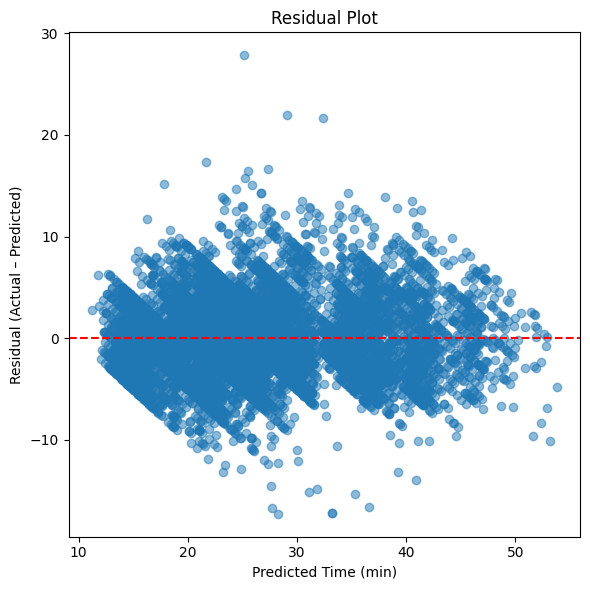

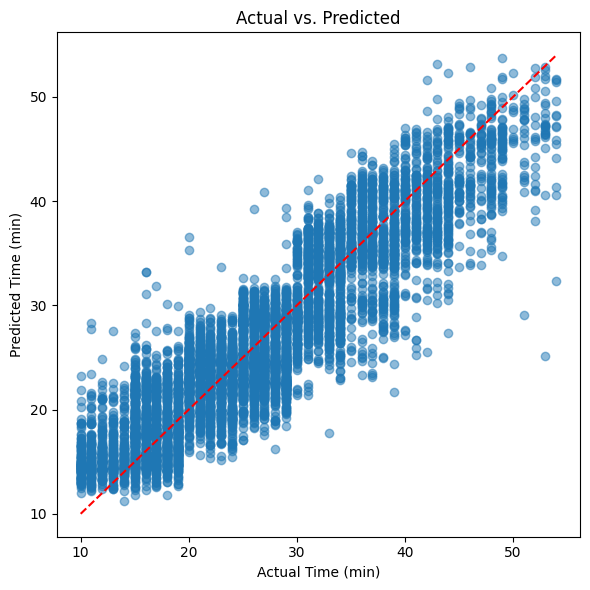

Saved delivery_time_model_v1.pkl


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import joblib

# 1. Load the best pipeline (or use grid_search.best_estimator_)
best_pipeline = grid_search.best_estimator_

# 2. Predict on the test set
y_pred = best_pipeline.predict(X_test)

# 3. Compute metrics
mae_test  = mean_absolute_error(y_test, y_pred)
mse_test  = mean_squared_error(y_test, y_pred)           # no 'squared' arg
rmse_test = np.sqrt(mse_test)                            # take square root yourself
r2_test   = r2_score(y_test, y_pred)

print(f"Test MAE:  {mae_test:.2f} minutes")
print(f"Test RMSE: {rmse_test:.2f} minutes")
print(f"Test R²:   {r2_test:.3f}")

# 4. Residual diagnostics
residuals = y_test - y_pred

plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Time (min)")
plt.ylabel("Residual (Actual – Predicted)")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Time (min)")
plt.ylabel("Predicted Time (min)")
plt.title("Actual vs. Predicted")
plt.tight_layout()
plt.show()

# 5. Save the pipeline for deployment
joblib.dump(best_pipeline, "delivery_time_model_v1.pkl")
print("Saved delivery_time_model_v1.pkl")


In [38]:
import joblib

# Load the trained pipeline
model = joblib.load("delivery_time_model_v1.pkl")
print("Model loaded successfully!")


Model loaded successfully!
